In [3]:
"""
とりあえず回帰分析の勉強をしよう...

refs. http://techtipshoge.blogspot.jp/2015/06/scikit-learn.html
"""
None

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

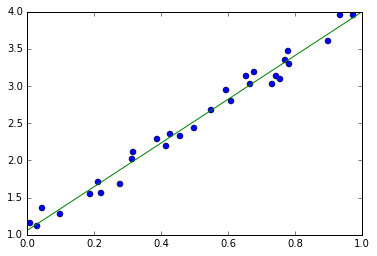

In [10]:
# 単純な線形回帰
from sklearn.linear_model import LinearRegression

# create samples
sample_size = 30
err_sigma = 0.1

x = np.random.rand(sample_size, 1)
err = err_sigma*np.random.randn(sample_size, 1)
y = 3 * x + 1 + err

# train a linear regression model
regr = LinearRegression()
regr.fit(x, y)

# make predictions
xt = np.linspace(0.0, 1.0, num=1000).reshape((1000, 1))
yt = regr.predict(xt)

# plot samples and regression result
plt.plot(x, y, 'o')
plt.plot(xt, yt)
plt.show()

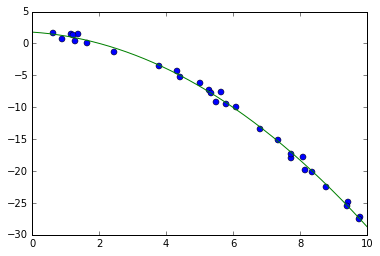

In [11]:
# 二次関数の回帰
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# create samples
sample_size = 30
err_sigma = 0.5

x = 10*np.random.rand(sample_size, 1)
err = err_sigma*np.random.randn(sample_size, 1)
y = -0.3 * x*x + 1 + err

# train a linear regression model
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
regr.fit(x, y)

# make predictions
xt = np.linspace(0.0, 10.0, num=1000).reshape((1000, 1))
yt = regr.predict(xt)

# plot samples and regression result
plt.plot(x, y, 'o')
plt.plot(xt, yt)
plt.show()

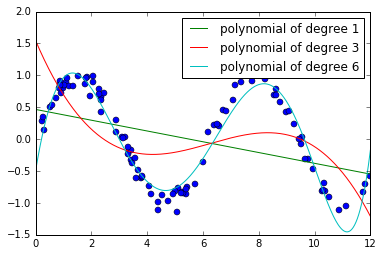

In [12]:
# sinの回帰
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from math import sin

# create samples
sample_size = 100
err_sigma = 0.1

x = 12*np.random.rand(sample_size, 1)
err = err_sigma*np.random.randn(sample_size, 1)
func = np.vectorize(sin)
y = func(x) + err

# plot train data
plt.plot(x, y, 'o')

# train linear regression models with different polynomial basis
deg = [1,3,6]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(x, y)

    # make predictions
    xt = np.linspace(0.0, 12.0, num=1000).reshape((1000, 1))
    yt = regr.predict(xt)

    # plot regression result
    plt.plot(xt, yt, label='polynomial of degree %d' % (d))

plt.legend()
plt.show()

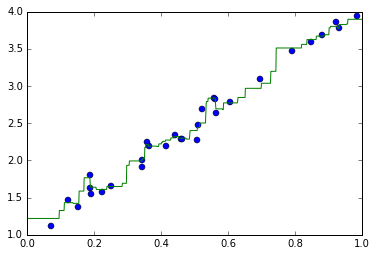

In [20]:
# ランダムフォレスト回帰
from sklearn.ensemble import RandomForestRegressor

# create samples
sample_size = 30
err_sigma = 0.1

x = np.random.rand(sample_size, 1)
err = err_sigma*np.random.randn(sample_size, 1)
y = 3 * x + 1 + err

# train a linear regression model
regr = RandomForestRegressor()
regr.fit(x, y.ravel())

# make predictions
xt = np.linspace(0.0, 1.0, num=1000).reshape((1000, 1))
yt = regr.predict(xt)

# plot samples and regression result
plt.plot(x, y, 'o')
plt.plot(xt, yt)
plt.show()

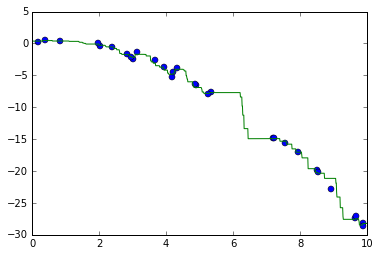

In [24]:
# create samples
sample_size = 30
err_sigma = 0.5

x = 10*np.random.rand(sample_size, 1)
err = err_sigma*np.random.randn(sample_size, 1)
y = -0.3 * x*x + 1 + err

# train a linear regression model
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('randomForest', RandomForestRegressor())
])
regr.fit(x, y.ravel())

# make predictions
xt = np.linspace(0.0, 10.0, num=1000).reshape((1000, 1))
yt = regr.predict(xt)

# plot samples and regression result
plt.plot(x, y, 'o')
plt.plot(xt, yt)
plt.show()

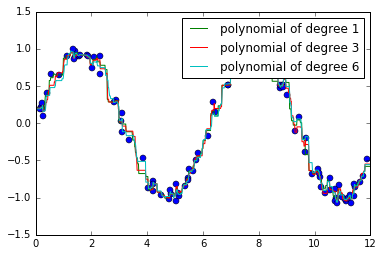

In [26]:
# create samples
sample_size = 100
err_sigma = 0.1

x = 12*np.random.rand(sample_size, 1)
err = err_sigma*np.random.randn(sample_size, 1)
func = np.vectorize(sin)
y = func(x) + err

# plot train data
plt.plot(x, y, 'o')

# train linear regression models with different polynomial basis
deg = [1,3,6]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('randomForest', RandomForestRegressor())
    ])
    regr.fit(x, y.ravel())

    # make predictions
    xt = np.linspace(0.0, 12.0, num=1000).reshape((1000, 1))
    yt = regr.predict(xt)

    # plot regression result
    plt.plot(xt, yt, label='polynomial of degree %d' % (d))

plt.legend()
plt.show()